In [ ]:
#created the link for all the dataset, no need to mount drive, directly run the cell to upload datasets

In [ ]:
songs_url ='https://raw.githubusercontent.com/ashoksihag/mrsdataset/main/kaggle_songs.txt?token=AQ2SHN3GKPQGQXCY4MVSIITAYZVJ6'
users_url = 'https://raw.githubusercontent.com/ashoksihag/mrsdataset/main/kaggle_users.txt?token=AQ2SHN6IUSKLVJSQXHG2CN3AYZVLQ'
vet_url = 'https://raw.githubusercontent.com/ashoksihag/mrsdataset/main/kaggle_visible_evaluation_triplets.txt?token=AQ2SHN5Y4CFDXJV2DHCRCA3AYZVMW'
tps_url = 'https://raw.githubusercontent.com/ashoksihag/mrsdataset/main/taste_profile_song_to_tracks.txt?token=AQ2SHN5DW3J6EPR7Z7YQ4RLAYZVS2'
ut_url = 'https://raw.githubusercontent.com/ashoksihag/mrsdataset/main/unique_tracks.txt?token=AQ2SHN2PF3PVYWEH34F7WY3AYZVYS'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime
 
from scipy import sparse
from scipy.sparse import csr_matrix
#in case matrices contain mostly zero values its Compressed Sparse Row matrix i.e csr_matrix()
 
from sklearn.decomposition import TruncatedSVD
#for convenience, projecting to a lower dimensional space, basically a dimensionality reduction(PCA) using Singular Value Decompostion(SVD)
from sklearn.metrics.pairwise import cosine_similarity
#for finding the cosine of the angle between two vectors projected in a multi-dimensional space

In [ ]:
songs = pd.read_table(songs_url, sep= ' ', names = ['songs', 'count'])

In [ ]:
songs.shape

(386213, 2)

In [ ]:
songs.head(2)

,songs,count
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2


In [ ]:
songs.tail(2)

,songs,count
386211,SOZZZWD12A6D4F6624,386212
386212,SOZZZWN12AF72A1E29,386213


**Total number of songs are 386213**

In [ ]:
users = pd.read_table(users_url, names=['users'])

In [ ]:
users.head(3)

,users
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4


In [ ]:
users.shape

(110000, 1)

 **Total number of user's are 110000**

In [ ]:
kvet = pd.read_csv(vet_url,sep='\t',  names=['user_id','song_id','freq'])
kvet.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
kvet.shape

(1450933, 3)

In [ ]:
kvet.tail(3)

,user_id,song_id,freq
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3


In [ ]:
ut = pd.read_csv(ut_url,sep='<SEP>',names=['track_id','song_id','artist_name','release'])
ut.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
ut.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [ ]:
#del ut['track_id']

Since the track_id column is of least importance, it can be deleted

In [ ]:
ut.shape

(1000000, 4)

In [ ]:
tps = pd.read_table(tps_url, sep='\t', names=['song_id', 'track_id'])
tps.head()

,song_id,track_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17


In [ ]:
tps.shape

(386213, 2)

#Missing Values : Check & Treat

In [ ]:
print(len(ut[ut['release'].isnull()].index.tolist()))
x = ut[ut['release'].isnull()].index.tolist()
print(x)

15
[64262, 114672, 229353, 264639, 458083, 557125, 578241, 652287, 697789, 697813, 725270, 795481, 853170, 857992, 925868]


In [ ]:
ut[ut['release'].isna()]

,track_id,song_id,artist_name,release
64262,TRWEQAA128EF36407B,SOVICLT12A58A7C4D0,Milton,NaN
114672,TRGYSOE12903CDCA99,SOAGRAA12AB018D567,Sébastien Roch,NaN
229353,TRRYWZX12903CDCAD0,SOOAFJX12AB018A028,Sébastien Roch,NaN
264639,TRBXMXG12903CDCA7F,SOLDTFD12AB018AFE6,Sébastien Roch,NaN
458083,TRAXBZR12903CDCA82,SOAUTVB12AB018AFF0,Sébastien Roch,NaN
557125,TRTNWIY12903CDCA7C,SOMPGYE12AB018AFE0,Sébastien Roch,NaN
578241,TRUMISC12903CDCAB3,SOVHAZH12AB018D5B3,Sébastien Roch,NaN
652287,TRLKLLK12903CDCAA2,SOECGBQ12AB018D582,Sébastien Roch,NaN
697789,TRJHIKS12903CDCAAD,SOTJWHR12AB018D5A0,Sébastien Roch,NaN
697813,TRJHIYF12903CB7FCF,SOBDDHR12AB01888A6,Remute,NaN


In [ ]:
ut.loc[ut['artist_name'] == 'Sébastien Roch']

,track_id,song_id,artist_name,release
114672,TRGYSOE12903CDCA99,SOAGRAA12AB018D567,Sébastien Roch,NaN
229353,TRRYWZX12903CDCAD0,SOOAFJX12AB018A028,Sébastien Roch,NaN
264639,TRBXMXG12903CDCA7F,SOLDTFD12AB018AFE6,Sébastien Roch,NaN
458083,TRAXBZR12903CDCA82,SOAUTVB12AB018AFF0,Sébastien Roch,NaN
557125,TRTNWIY12903CDCA7C,SOMPGYE12AB018AFE0,Sébastien Roch,NaN
578241,TRUMISC12903CDCAB3,SOVHAZH12AB018D5B3,Sébastien Roch,NaN
652287,TRLKLLK12903CDCAA2,SOECGBQ12AB018D582,Sébastien Roch,NaN
697789,TRJHIKS12903CDCAAD,SOTJWHR12AB018D5A0,Sébastien Roch,NaN
795481,TRVEUCB12903CDCAB8,SOSFNKO12AB018D5BB,Sébastien Roch,NaN
853170,TROCNBR12903CDCA78,SOASSAS12AB018AFCF,Sébastien Roch,NaN


In [ ]:
ut['release'] = ut['release'].fillna((ut['release'].mode()[0]))
ut.iloc[857992,:]

track_id       TROFVVS12903CDCA87
song_id        SOZDBDL12AB018AFFF
artist_name        Sébastien Roch
release                     Intro
Name: 857992, dtype: object

In [ ]:
print(len(ut[ut['release'].isnull()].index.tolist()))

0


Successfully replaced all the NaN values in the release column with the mode of the same column, i.e 'Intro'

#Checking Duplicates Values

In [ ]:
duplicated = kvet.duplicated()
sum(duplicated)

0

In [ ]:
duplicated = ut.duplicated()
sum(duplicated)

0

In [ ]:
print(sum(kvet.isnull().any()),sum(ut.isnull().any()))

0 0


In [ ]:
duplicated = ut['song_id'].duplicated()
sum(duplicated)

944

In [ ]:
duplicated_song=ut[ut['song_id'].duplicated()]
duplicated_song.head()

,track_id,song_id,artist_name,release
18309,TRMNFVE128F932907E,SOPFBUZ12AF729C896,Snow Patrol,Spitting Games
32760,TRMDYQQ128F428080C,SOJHKXX12A8C139798,Incubus,A Crow Left Of The Murder
33033,TRMOHMT128F92FD3D3,SOLTAEJ12A8C13F793,Foo Fighters,What If I Do?
49718,TRWFAGT128F4213B6E,SONEJDQ12A6D4FA71C,Snow Patrol,Starfighter Pilot
54218,TRWIPEU128E078997D,SONVJUL12A6701FB7A,Weezer,The Damage In Your Heart


In [ ]:
#Dropping the duplicates values
ut_clean=pd.DataFrame() #Created an empty dataframe
ut_clean=ut.drop_duplicates(subset='song_id') #Dropped the duplicated values

In [ ]:
ut_clean['song_id'].duplicated().sum() # Now no duplicated values is present

0

In [ ]:
ut_clean['track_id'].duplicated().sum()

0

In [ ]:
ut_clean.shape #Shape of the cleaned dataframe

(999056, 4)

In [ ]:
kvet.shape

(1450933, 3)

**From kvet dataframe we will only take first 999056 which will be equal to the total values from ut_clean dataframe**

In [ ]:
kvet_new=kvet.head(999056)

In [ ]:
kvet_new.shape

(999056, 3)

Now both ut_clean and kvet_new have same shape and can be merged together

#Merging the DataFrames

In [ ]:
song_df=pd.merge(kvet,ut_clean.drop_duplicates(["song_id"]),on="song_id",how='left')
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [ ]:
song_df.tail()

,user_id,song_id,freq,track_id,artist_name,release
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,TRZJNDO128EF343498,Angels and Airwaves,The Gift


In [ ]:
song_df.shape

(1450933, 6)

In [ ]:
song_df['song_id'].duplicated().sum()

1287727

In [ ]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
release        0
dtype: int64

In [ ]:
song_df.dropna(inplace=True)

In [ ]:
print("Shape: ",song_df.shape)
song_df.isnull().sum()

Shape:  (1450933, 6)


user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
release        0
dtype: int64

In [ ]:
print("Total data points",song_df.shape[0])
print("Total number of unique user:",song_df["user_id"].unique().shape[0])
print("Total number of unique Tracks:",song_df["track_id"].unique().shape[0])
print("Toal number of unique song id:",song_df['song_id'].unique().shape[0])

Total data points 1450933
Total number of unique user: 110000
Total number of unique Tracks: 163206
Toal number of unique song id: 163206


In [ ]:
print("Number of Unique releases:",song_df["release"].unique().shape[0])
print("Number of Unique Artist :",song_df["artist_name"].unique().shape[0])

Number of Unique releases: 137622
Number of Unique Artist : 28361


In [ ]:
pd.set_option('display.float_format', lambda x:'%.3f'%x)

In [ ]:
song_df.describe()

,freq
count,1450933.000
mean,3.187
std,7.052
min,1.000
25%,1.000
50%,1.000
75%,3.000
max,923.000


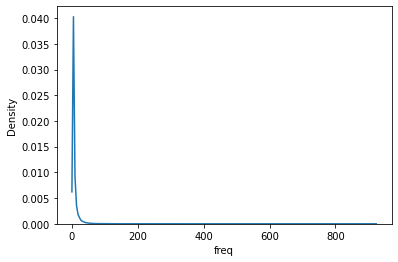

In [ ]:
sns.kdeplot(data=song_df,x="freq")

Number of song per user : 
The kde plot depicts the play count is close to 1 for many songs.

In [ ]:
songs_per_user=song_df.groupby("user_id")["freq"].count()
songs_per_user.head()

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
Name: freq, dtype: int64

In [ ]:
songs_per_user.sort_values().head()

user_id
336c306c5df497a9cb4067c14d5b840ba1a1e272    5
47b83637c7726c40218552445e1dc9b906f0ad6d    5
5519a61514f2248435a70afad322568c1a1173eb    5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2    5
18cb5d68334667324a9bac0a66f6579f34f43a31    5
Name: freq, dtype: int64

In [ ]:
songs_per_user.sort_values().tail()

user_id
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
d30e18323f15426c3cdc8585252ed34459916f51    52
7d90be8dfdbde170f036ce8a4b915440137cb11c    53
Name: freq, dtype: int64

In [ ]:
songs_per_user.describe()

count   110000.000
mean        13.190
std          8.071
min          5.000
25%          7.000
50%         11.000
75%         17.000
max         53.000
Name: freq, dtype: float64

* Average number of songs heard by per user is 13.563
* Median songs heard by per user is 11





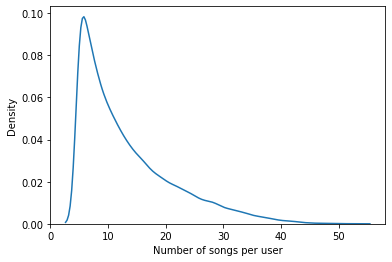

In [ ]:
plt.xlabel("Number of songs per user")
sns.kdeplot(songs_per_user)
plt.show()

#Analysis of Popular Artist

In [ ]:
artist_popularity=song_df.groupby("artist_name")["freq"].count()
artist_popularity.head()

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
Name: freq, dtype: int64

In [ ]:
artist_popularity.tail()

artist_name
Étienne Daho      45
Íon                5
Ólafur Arnalds    78
Órla Fallon        1
Özlem Tekin        1
Name: freq, dtype: int64

In [ ]:
artist_popularity.sort_values().head()

artist_name
Özlem Tekin                      1
Chris Connelly and the Bells     1
Mad Professor / Mafia & Fluxy    1
Maddox Brothers & Rose           1
Madreblu                         1
Name: freq, dtype: int64

In [ ]:
artist_popularity.sort_values().tail(20)

artist_name
Black Eyed Peas            4299
Metallica                  4970
Harmonia                   5046
Björk                      5144
John Mayer                 5282
Daft Punk                  5379
The Killers                5391
Radiohead                  5408
Linkin Park                5623
Taylor Swift               5648
Muse                       5849
OneRepublic                6027
Eminem                     6297
The Black Keys             6507
Train                      6617
Jack Johnson               6784
Justin Bieber              7669
Florence + The Machine     8213
Kings Of Leon              8514
Coldplay                  12279
Name: freq, dtype: int64

In [ ]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [ ]:
song_df.mode()['artist_name'][0]

'Coldplay'

In [ ]:
song_df.mode()['release'][0]

'Sehr kosmisch'

Insights drawn till now : 

1. The play count most of the cases is close to 2.
2. No of songs per user are between 3 and 7.
3. Max no of songs for a particular user are 57
4. On an average , the user listens to 13 songs ; & min being of 5 songs.
5. The artist 'Coldplay' has max plays.
6. The song 'Sehr kosmisch' is most played song.
7. There are 28367 Number of Unique Artists.


In [ ]:
all_release=song_df.groupby("artist_name")
print(all_release.get_group("Coldplay")["release"])

122                Yellow
336         The Scientist
353               Fix You
360         The Scientist
365                Yellow
                ...      
1450525     The Scientist
1450545    Speed Of Sound
1450651            Yellow
1450655            Shiver
1450841     White Shadows
Name: release, Length: 12279, dtype: object


In [ ]:
print(all_release.get_group("Justin Bieber")["release"])

707           Somebody To Love
799              Down To Earth
839                   One Time
840                    U Smile
842              Favorite Girl
                  ...         
1449740     Common Denominator
1449877          Down To Earth
1449886       Never Let You Go
1450081           Runaway Love
1450097    Stuck In The Moment
Name: release, Length: 7669, dtype: object


In [ ]:
sorted_artist_popularity=artist_popularity.sort_values(ascending=False)

In [ ]:
sorted_artist_popularity.head()

artist_name
Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Name: freq, dtype: int64

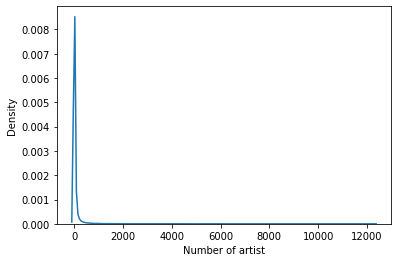

In [ ]:
plt.xlabel("Number of artist")
sns.kdeplot(artist_popularity)
plt.show()

* Only very few artist are very popular
* Around 250-350 artist are very popular out of 28367

### Analysing the most popular track

In [ ]:
popular_track=song_df['track_id'].mode()[0]
print(popular_track)

TRDMBIJ128F4290431


In [ ]:
track_groupby=song_df.groupby('track_id')
popular_track_info=track_groupby.get_group(popular_track)

In [ ]:
popular_track_info.shape

(5043, 6)

In [ ]:
popular_track_info.head()

,user_id,song_id,freq,track_id,artist_name,release
22,d68dc6fc25248234590d7668a11e3335534ae4b4,SOFRQTD12A81C233C0,1,TRDMBIJ128F4290431,Harmonia,Sehr kosmisch
366,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOFRQTD12A81C233C0,2,TRDMBIJ128F4290431,Harmonia,Sehr kosmisch
455,bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca,SOFRQTD12A81C233C0,11,TRDMBIJ128F4290431,Harmonia,Sehr kosmisch
564,6493c305190b52657d4ea3f4adf367ffcf3427af,SOFRQTD12A81C233C0,3,TRDMBIJ128F4290431,Harmonia,Sehr kosmisch
693,a5d92e23cf3f711dfc473f1c3b296492ec02effd,SOFRQTD12A81C233C0,7,TRDMBIJ128F4290431,Harmonia,Sehr kosmisch


In [ ]:
print("Name of artist with most popular track:",popular_track_info['artist_name'].unique()[0])
print("Name of release with most popular track:",popular_track_info['release'].unique()[0])
print("No of unique users listening to the popular track is:",popular_track_info['user_id'].shape[0])

Name of artist with most popular track: Harmonia
Name of release with most popular track: Sehr kosmisch
No of unique users listening to the popular track is: 5043


### Analysing frequency

In [ ]:
song_df['freq'].describe()

count   1450933.000
mean          3.187
std           7.052
min           1.000
25%           1.000
50%           1.000
75%           3.000
max         923.000
Name: freq, dtype: float64

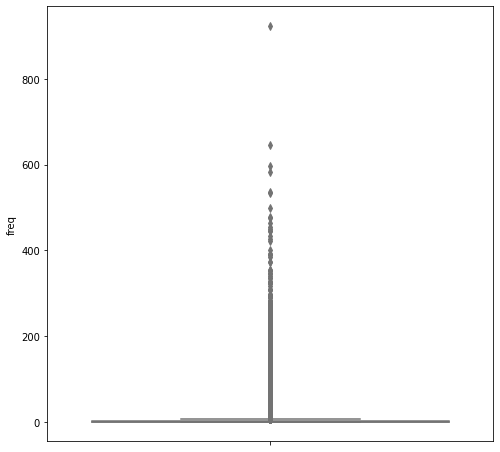

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=song_df['freq'],palette='rainbow')

In [ ]:
print("Song which was palyed maximum times by a user:",song_df['release'][song_df['freq'].max()])
print("The artist of song Mondo Bongo:",song_df['artist_name'][song_df['freq'].max()])

Song which was palyed maximum times by a user: Son Of Dragon
The artist of song Mondo Bongo: Liquid People


### Visualization of top 10 artist and top 10 song

In [ ]:
artist_top_10=song_df['artist_name'].value_counts().head(10)
print(artist_top_10)
x_artist=['Coldplay','Kings Of Leon','Justin Bieber','Florence + The Machine','Eminem','Muse','Jack Johnson','Taylor Swift','Train','The Black Keys']
y_artist=[13675,11586,9259,8213,8160,7916,7465,7435,6617,6507]

Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Train                      6617
The Black Keys             6507
Eminem                     6297
OneRepublic                6027
Muse                       5849
Name: artist_name, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

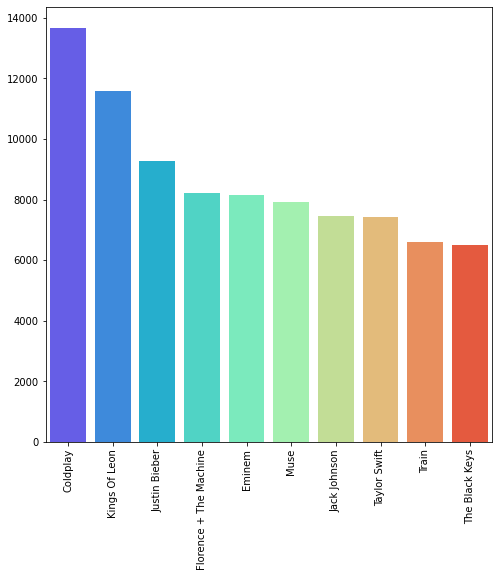

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=x_artist,y=y_artist,palette='rainbow')
plt.xticks(rotation=90)

In [ ]:
song_top_10=song_df['release'].value_counts().head(10)
print(song_top_10)
x_songs=['Sehr kosmisch','Undo',"You're The One",'Use Somebody','Dog Days Are Over (Radio Edit)','Revelry','Secrets','Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)','Somebosy To Love','Hey_ Soul Sister']
y_songs=[5043,4483,4270,3822,3780,3672,3456,3272,3263,2791]

Sehr kosmisch                                                          5043
Undo                                                                   4483
You're The One                                                         4270
Dog Days Are Over (Radio Edit)                                         3780
Revelry                                                                3672
Secrets                                                                3456
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Hey_ Soul Sister                                                       2791
Fireflies                                                              2745
Tive Sim                                                               2669
Name: release, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

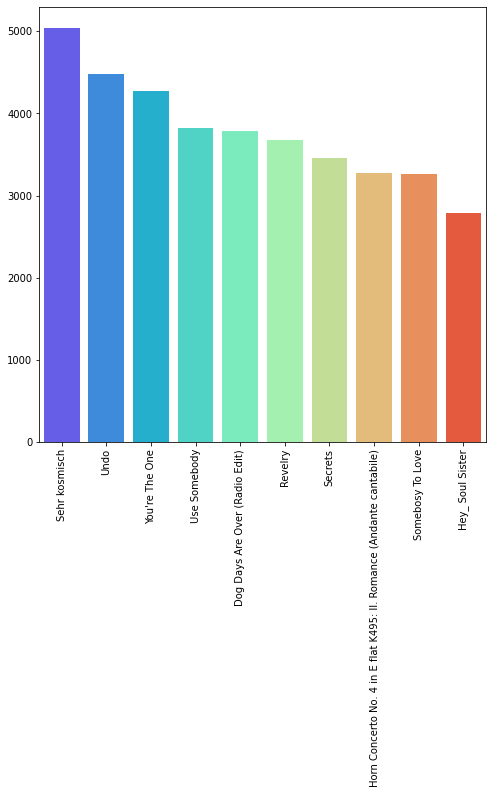

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=x_songs,y=y_songs,palette='rainbow')
plt.xticks(rotation=90)

**Important takeout from frequency Analysis**

*   Maximum time any song has been played by a user is 923
*   The song which has been palyed maximum times by a user is 'Mondo Bongo'
*   The artist of song Mondo Bongo: Joe Strummer & The Mescaleros



**Dropping the track_id and creating the new dataframe song_df_new**

#Implementing Recommender System Models

In [ ]:
song_df_new=song_df.drop('track_id',axis=1)

In [ ]:
song_df_new.columns

Index(['user_id', 'song_id', 'freq', 'artist_name', 'release'], dtype='object')

In [ ]:
song_df_new.shape

(1450933, 5)

In [ ]:
song_df_new.head()

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


## Popularity Based Recommender System

In popularity based recommender system, we will predict which songs has been hears by maximum users i.e most popular songs and will predict them to the users.

In [ ]:
song_df_new['freq'].value_counts(ascending=True).head(20)

923    1
189    1
259    1
187    1
262    1
264    1
265    1
267    1
270    1
184    1
274    1
276    1
281    1
215    1
283    1
290    1
256    1
253    1
198    1
242    1
Name: freq, dtype: int64

In [ ]:
most_freq_by_user=song_df_new.sort_values('freq',ascending=False)
most_freq_by_user.head(10)

,user_id,song_id,freq,artist_name,release
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)
838445,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of
471133,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow
1297745,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love
642730,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself
363980,9d12c30de5d9975f621f95f512699989ac544410,SOFFXAQ12A8AE45C2E,535,Fear My Thoughts,Death Chamber
178584,fa82c0a1a93b7c52870d7b0a004b444bbdf19401,SOCNAXF12A6D4F9B34,500,Alliance Ethnik,Creil City
124736,388f7b7150bd020ce59b82603f7dd29f590ff8ed,SORJSQI12A6701D62D,478,Deep Dish,Say Hello (Angello & Ingrosso Remix)
186575,fbda29133162e205279fd1c49119ea0a28c163c1,SODWONG12A8C1421B3,476,Brad Paisley,I'm Still A Guy
1232498,090b841eaf56d343a26625c2c6d08b823927bc4f,SOJSXJY12A8C13E32E,463,Clara Hill,Clara meets Slope - Hard To Say


**These are the top 10 most popular songs which are palyed by most of the users and we can recommend them to other users.**

In [ ]:
popular_among_users=song_df_new['release'].value_counts(ascending=False).head(10)
print("Top 10 popular songs are:- ")
print(popular_among_users)

Top 10 popular songs are:- 
Sehr kosmisch                                                          5043
Undo                                                                   4483
You're The One                                                         4270
Dog Days Are Over (Radio Edit)                                         3780
Revelry                                                                3672
Secrets                                                                3456
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Hey_ Soul Sister                                                       2791
Fireflies                                                              2745
Tive Sim                                                               2669
Name: release, dtype: int64


**Creating the dataframe of these 10 most popular songs** 

In [ ]:
popular_among_users_df=popular_among_users.to_frame() # Changing series to dataframe
popular_among_users_df.reset_index(level=0,inplace=True) # Changing index column into column
popular_among_users_df.columns=['song_name','frequency'] #Changing the name of the columns
popular_among_users_df

,song_name,frequency
0,Sehr kosmisch,5043
1,Undo,4483
2,You're The One,4270
3,Dog Days Are Over (Radio Edit),3780
4,Revelry,3672
5,Secrets,3456
6,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
7,Hey_ Soul Sister,2791
8,Fireflies,2745
9,Tive Sim,2669


**Visuslizing top 10 popular song among users**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

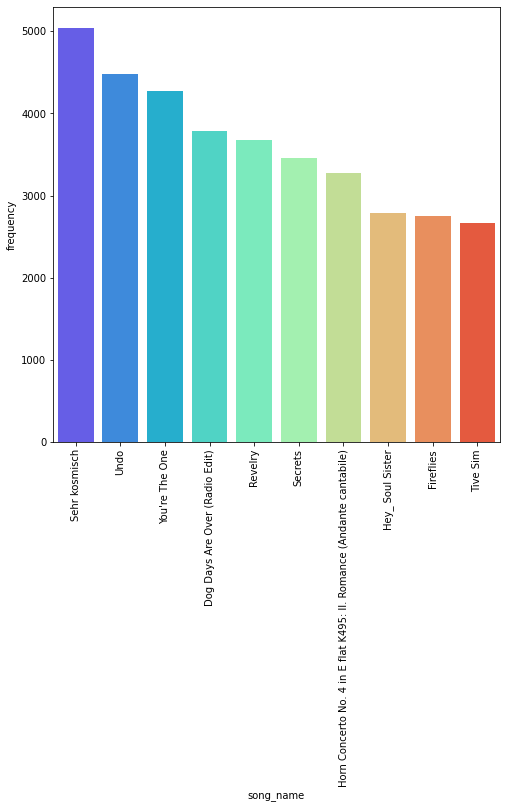

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=popular_among_users_df['song_name'],y=popular_among_users_df['frequency'],palette='rainbow')
plt.xticks(rotation=90)

## Content Based Recommender System

In [ ]:
import scipy

In [ ]:
 song_df_content=song_df.head(10000)
song_df_content

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
9995,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOCKSGZ12A58A7CA4B,2,TRQTLTB128F92F785B,Linkin Park,Bleed It Out [Live At Milton Keynes]
9996,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOQLUTQ12A8AE48037,1,TRTEGUJ128F425B7D3,Foo Fighters,The Pretender
9997,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOONKHS12AB018E4C6,10,TRHJNJB12903CCF029,Madonna,Revolver [feat. Lil Wayne]
9998,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOUGUKH12A8C13FBB0,3,TRLICFS128F42920C9,The Wombats,Moving To New York (album version)


In [ ]:
#from collections import defaultdict
#d=defaultdict(LabelEncoder)
#fit=song_df.apply(lambda x:d[x.name].fit_transform(x))

In [ ]:
#sparse_matrix=scipy.sparse.csr_matrix(fit.values)

In [ ]:
#print(sparse_matrix)

In [ ]:
#sparse_matrix.shape

In [ ]:
#from sklearn.metrics.pairwise import sigmoid_kernel

In [ ]:
#sig=sigmoid_kernel(sparse_matrix,sparse_matrix)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

<b>What is TF-IDF?</b><br>
The full form is term frequency and inverse document frequecy.
we multiply the TF and IDF to convert out sentence to vector.<br>
TF=No. of repetation of words in sentence/ No. of words in sentence<br>
From this formula it calculates the term frequency.<br>
IDF= log(NO. of sentences/No.of sentences containing the words)<br>
After getting the both values we multiply the TF and IDF.After multiplying we will get the frequency of words with respect to importance of words.
Here we get different values for each word.


In [ ]:
tf=TfidfVectorizer(min_df=3,max_features=None,strip_accents="unicode",analyzer='word',ngram_range=(1,3),stop_words="english")

In [ ]:
song_df_content["release"]=song_df_content["release"].drop_duplicates()
song_df_content["release"]=song_df_content["release"].fillna('')

Here we have removed the duplicate releases, to make sure our recommendations to be unique and different relseas.

In [ ]:
tfv_matrix=tf.fit_transform(song_df_content["release"])
tfv_matrix

<10000x1176 sparse matrix of type '<class 'numpy.float64'>'
	with 11687 stored elements in Compressed Sparse Row format>

We have applied the TF-IDF on release feature of dataset.

In [ ]:
tfv_matrix

<10000x1176 sparse matrix of type '<class 'numpy.float64'>'
	with 11687 stored elements in Compressed Sparse Row format>

Here we can see we have got our Sparse matrix with shape (10000,2459)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarities=linear_kernel(tfv_matrix,tfv_matrix)

In [ ]:
cosine_similarities[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
indices=pd.Series(song_df_content.index,index=song_df_content["artist_name"]).drop_duplicates()

<b>What is cosine smilarity?</b><br>
Here we compute the angle between two vectores drawn from origin to towards the two points. cosine similarity is the angle between the two points. Smaller the theta more close the points, means more similar.<br>
cosine distance =1-cosine similarity<br>
cosine similarity=cos(theta)<br>
theta is angle between two vectores.

In [ ]:
indices

artist_name
Dwight Yoakam                                                                0
Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner       1
Cartola                                                                      2
Lonnie Gordon                                                                3
Miguel Calo                                                                  4
                                                                          ... 
Linkin Park                                                               9995
Foo Fighters                                                              9996
Madonna                                                                   9997
The Wombats                                                               9998
Linkin Park                                                               9999
Length: 10000, dtype: int64

In [ ]:
def giv_rec(artist_name,cosine_similarities=cosine_similarities):
    idx=indices[artist_name][0]
    sig_scores=list(enumerate(cosine_similarities[idx]))
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    sig_scores=sig_scores[1:11]
    song_indices=[i[0] for i in sig_scores]
    return song_df[["artist_name","release"]].iloc[song_indices]

Here we have built the function to get the input from user and recommed <br>the diffrent release from our recommendation engine.

In [ ]:
giv_rec("Madonna")

,artist_name,release
6870,Britney Spears,The Beat Goes On
2780,Twista feat. Kayne West & Jamie Foxx,Slow Jamz (Feat. Kanye West & Jamie Foxx) (Edi...
476,Kid Sister,Pro Nails ft. Kanye West [Radio Edit]
7647,Sonny & Cher,The Beat Goes On (Single Version)
6582,Fort Minor [Featuring Holly Brook And Jonah Ma...,Where'd You Go (Featuring Holly Brook & Jonah ...
6958,Danger Doom,The Mask (Featuring Ghostface Killah) (Album V...
4096,Andrew Bird,Dora Goes To Town (Album Version)
1697,The Avett Brothers,It Goes On And On
1842,Fall Out Boy,Beat It
7291,Aaron Carter,That's How I Beat Shaq


We can see if the person listens to Beat Goes On [Featuring Kanye West] (Album Version) then it will suggest the beat goes on from britney Spears and following recommendations.

## Collaborative Based Recommender System

Collaborative Filters work with an interaction matrix, also called rating matrix. The aim of this algorithm is to learn a function that can predict if a user will benefit from an item - meaning the user will likely buy, listen to, watch this item.

Among collaborative-based systems, we can encounter two types: user-item filtering and item-item filtering.

We'll go through the steps for generating a music recommender system. This time, we are going to use a matrix factorization approach

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix


In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

Preparing Data

In [ ]:
song_df=pd.merge(kvet,ut,on="song_id",how='inner')
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [ ]:
song_df.shape

(1491952, 6)

In [ ]:
song_df=song_df.drop('track_id',axis=1)

In [ ]:
song_df.head()

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One


In [ ]:
song_df.isna().sum().sum()

0

In [ ]:
song_df = song_df.dropna()

In [ ]:
duplicated = song_df.duplicated()
sum(duplicated)

35387

In [ ]:
song_df = song_df.drop_duplicates()

In [ ]:
song_df.shape

(1456565, 5)

Before modeling we need to find how many times a user listen to the same song on average.

In [ ]:
song_user = song_df.groupby('song_id')['user_id'].count()

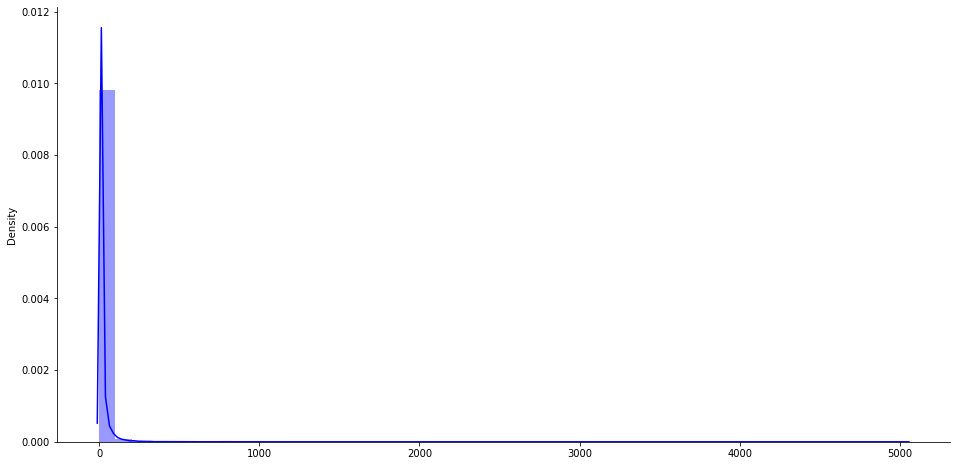

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")

A song is listened for an average of 8.924702523191549 users, with minimum 1 and maximum 5043 users


In [ ]:
listen_counts = pd.DataFrame(song_df.groupby('freq').size(), columns=['count'])

In [ ]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['freq'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 923



Model and recommendations

Matrix Factorization is a powerful way to implement a recommendation system. The idea behind it is to represent users and items in a lower-dimensional latent space.

So, in other words, Matrix factorization methods decompose the original sparse user-item matrix into lower dimensionality less sparse rectangular matrices with latent features.

This does not only solve the sparsity issue but also makes the method scalable. It doesn't matter how big the matrix is, you can always find lower dimensionality matrices that are a true representation of the original one.

Among the different matrix factorization techniques, we found the popular singular value decomposition (SVD).

This can be an abstract concept as we deepen into the mathematical foundations. But we'll try to keep it as simple as possible. Imagine we have a matrix A that contains the data for n users x m songs. This matrix can be decomposed uniquely into 3 matrices; let's called them U, S, and V.

In terms of our song recommender:

U is an n users x r user-latent feature matrix
V is an m songs x r song-latent feature matrix
S is an r x r non-negative diagonal matrix containing the singular values of the original matrix.
Instead of working with the implicit rating as it is, we'll apply the binning technique. 

We'll define 10 categories. The original data values which fall into the interval from 0 to 1, will be replaced by the representative rating of 1; if they fall into the interval 1 to 2, they will be replaced by 2; and so on and so forth. The last category will be assigned to original values ranging from 9 to 923

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 923]
song_df['freq'] = pd.cut(song_df['freq'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
listen_counts = pd.DataFrame(song_df.groupby('freq').size(), columns=['count']).reset_index(drop=False)

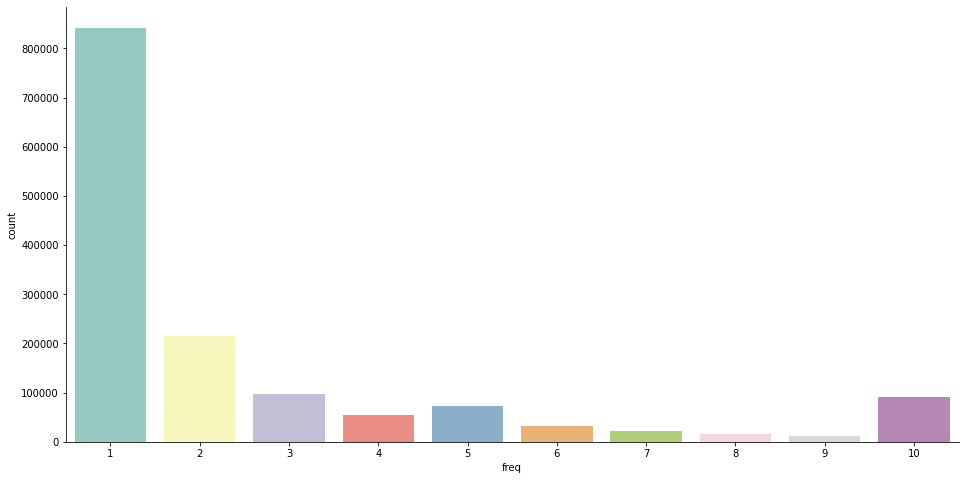

In [ ]:

plt.figure(figsize=(16, 8))
sns.barplot(x='freq', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

For this, we are going to use a fun package called surprise. Surprise is an easy-to-use Python library specially designed for recommender systems.

To load a dataset from our DataFrame, we will use the load_from_df() method.

We will need to pass the following parameters:

df: The dataframe containing the ratings. It must have three columns, corresponding to the user ids, the song ids, and the ratings.
reader (Reader): A reader to read the file. Only the rating_scale field needs to be specified.

In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(song_df[['user_id', 'song_id', 'freq']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)


We'll use the built-in function for SVD. First, a set of parameters is going to be defined to search for the best parameters for the model.

The GridSearchCV class will compute accuracy metrics for the SVDalgorithm on the combinations of parameters selected, over a cross-validation procedure. This is useful for finding the best set of parameters for a prediction algorithm.

In [ ]:
param_grid = {'n_factors': [160], 'n_epochs': [100], 'lr_all': [0.001, 0.005], 'reg_all': [0.08, 0.1]}

In [ ]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [ ]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed: 15.7min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed: 23.6min remaining:    0.0s


2.3014273649455657
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed: 93.8min finished


In [ ]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.2816  2.2809  2.2856  2.2793  2.2834  2.2822  0.0021  
Fit time          553.68  558.46  552.90  555.32  552.92  554.65  2.10    
Test time         4.02    4.06    4.08    4.07    5.23    4.29    0.47    


{'fit_time': (553.6762588024139,
  558.4593071937561,
  552.898600101471,
  555.316885471344,
  552.9155902862549),
 'test_rmse': array([2.28164274, 2.28093735, 2.2855514 , 2.27929235, 2.28341824]),
 'test_time': (4.020283460617065,
  4.063281774520874,
  4.076776742935181,
  4.072638511657715,
  5.23134446144104)}

After finding the best parameters for the model, we create our final model, train it and find the error for the test set.

In [ ]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.2868
The RMSE is 2.2867605173981835


# Hybrid Music Recommender System

In [ ]:
!pip install scikit-surprise

In [ ]:
import surprise
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy

from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [ ]:
song_df=pd.merge(kvet,ut,on="song_id",how='inner')
song_df=song_df.drop('track_id',axis=1)
song_df.head()

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One


In [ ]:
song_df = song_df.drop_duplicates()

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 923]
song_df['freq'] = pd.cut(song_df['freq'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
#reader = Reader(rating_scale=(1, 10))
#data = Dataset.load_from_df(song_df[['user_id', 'song_id', 'freq']], reader)


In [ ]:
rawTrain, rawholdout = train_test_split(song_df, test_size=.25)

In [ ]:
reader = Reader(rating_scale=(1, 10))
data = surprise.Dataset.load_from_df(rawTrain[['user_id', 'song_id', 'freq']],reader)
holdout = surprise.Dataset.load_from_df(rawholdout[['user_id', 'song_id', 'freq']],reader)

In [ ]:
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) # split data into folds.

In [ ]:
#sim_options = sim_options = {'name': 'cosine','user_based': False  # compute  similarities between items}
#collabKNN = surprise.KNNBasic(k=40) 
#rmseKNN = []
rmseSVD = []
rmseCo = []
rmseSlope = []
#for trainset, testset in kSplit.split(data): #iterate through the folds.
#    collabKNN.fit(trainset)
#    predictionsKNN = collabKNN.test(testset)
 #   rmseKNN.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))#get root means squared error

In [ ]:
funkSVD = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=30,n_epochs=10,biased=True)

In [ ]:
min_error = 1
for trainset, testset in kSplit.split(data): #iterate through the folds.
    funkSVD.fit(trainset)
    predictionsSVD = funkSVD.test(testset)
    rmseSVD.append(surprise.accuracy.rmse(predictionsSVD,verbose=True))#get root means squared error

RMSE: 2.3411
RMSE: 2.3464
RMSE: 2.3279
RMSE: 2.3367
RMSE: 2.3483
RMSE: 2.3275
RMSE: 2.3360
RMSE: 2.3342
RMSE: 2.3440
RMSE: 2.3451


In [ ]:
coClus = surprise.prediction_algorithms.co_clustering.CoClustering(n_cltr_u=4,n_cltr_i=4,n_epochs=25) 
for trainset, testset in kSplit.split(data): #iterate through the folds.
    coClus.fit(trainset)
    predictionsCoClus = coClus.test(testset)
    rmseCo.append(surprise.accuracy.rmse(predictionsCoClus,verbose=True))#get root means squared error

RMSE: 2.4484
RMSE: 2.4562
RMSE: 2.4853
RMSE: 2.4461
RMSE: 2.4866
RMSE: 2.4304
RMSE: 2.4429
RMSE: 2.4906
RMSE: 2.4661
RMSE: 2.4417


In [ ]:
slopeOne = surprise.prediction_algorithms.slope_one.SlopeOne()

In [ ]:
#plotting the prediction data:
import matplotlib.pyplot as plt
for prediction in compiledPredictions:
    #modelPrediction = plt.plot(rmseKNN,label='knn')
    modelPrediction = plt.plot(rmseSVD,label='svd')
    modelPrediction = plt.plot(rmseCo,label='cluster')
    modelPrediction = plt.plot(rmseSlope,label='slope')

    modelPrediction = plt.xlabel('folds')
    modelPrediction = plt.ylabel('accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
class HybridFacto(surprise.AlgoBase):
    def __init__(self,epochs, learning_rate,num_models):
        self.alpha = np.array([1/num_models]*num_models)
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    def fit(self,holdout):
        holdout=holdout.build_full_trainset().build_testset()
        for epoch in range(self.epochs):
            
            predictions = np.array([funkSVD.test(holdout),coClus.test(holdout),slopeOne.test(holdout)])
            maeGradient = [surprise.accuracy.mae(prediction) for prediction in predictions]
            newalpha = self.alpha - learning_rate * maeGradient  
            #convergence check:
            if newalpha - self.alpha < 0.001:
                break
            self.alpha = newalpha
            
    def estimate(self,u,i):
        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
        algoResults = np.array([collabKNN.predict(u,i),funkSVD.predict(u,i),coClus.predict(u,i),slopeOne.predict(u,i)])
        return np.sum(np.dot(self.alpha,algoResults))

In [ ]:
hybrid = HybridFacto(epochs=10, learning_rate=0.05, num_models=3)
hybrid.fit(holdout)
rmseHyb = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    predhybrid = Hyhybrid.test(testset)
    rmseHyb.append(surprise.accuracy.rmse(predhybrid))

In [ ]:
#plotting the prediction data:
for prediction in compiledPredictions:
    #modelPrediction = plt.plot(rmseKNN,label='knn')
    modelPrediction = plt.plot(rmseSVD,label='svd')
    modelPrediction = plt.plot(rmseCo,label='cluster')
    modelPrediction = plt.plot(rmseSlope,label='slope')
    modelPrediction = plt.plot(rmseHyb,label='Hybrid')

    modelPrediction = plt.xlabel('folds')
    modelPrediction = plt.ylabel('accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)